In [ ]:
############ DATA NOTES ############

# name: breast cancer diagnostic
# features: characteristics of cancer cells of patients
# target: predict the "class" of the patient, whether "recurrence-events" or "no-recurrence-events"

# important metric: recall should be high, no missed illness (low false negatives)

In [2]:
import df_utils as utils

In [3]:
############ CONFIGURATION ############

# list desired settings
data_config = {
    "dataset": "breast_cancer",
    "index": "ID",
    "target": "class",
    "imbalanced": True,
    "has_test": True,
    "remove_features": True,
}

In [4]:
# import data set
(data, _) = utils.import_data(data_config["dataset"], has_test=data_config["has_test"], raw=True)

importing from: data/data_raw/breast_cancer.csv


In [5]:
############ PRE-PROCESSING ############

# check data types
print(data.dtypes)

ID                          int64
class                        bool
radiusMean                float64
textureMean               float64
perimeterMean             float64
areaMean                  float64
smoothnessMean            float64
compactnessMean           float64
concavityMean             float64
concavePointsMean         float64
symmetryMean              float64
fractalDimensionMean      float64
radiusStdErr              float64
textureStdErr             float64
perimeterStdErr           float64
areaStdErr                float64
smoothnessStdErr          float64
compactnessStdErr         float64
concavityStdErr           float64
concavePointsStdErr       float64
symmetryStdErr            float64
fractalDimensionStdErr    float64
radiusWorst               float64
textureWorst              float64
perimeterWorst            float64
areaWorst                 float64
smoothnessWorst           float64
compactnessWorst          float64
concavityWorst            float64
concavePointsW

In [6]:
# set data index
data = utils.set_data_index(data, data_config["index"])

In [7]:
############ VISUALIZATION ############

# get quick overview of the data structure
display(data)

,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
ID,,,,,,,,,,,,,,,,,,,,,
886452,True,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,...,16.39,22.07,108.10,826.0,0.1512,0.3262,0.3209,0.13740,0.3068,0.07957
84348301,True,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
9012795,True,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,0.1973,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.4024,0.19660,0.2730,0.08666
894326,True,18.22,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.07950,0.1807,...,21.84,25.00,140.90,1485.0,0.1434,0.2763,0.3853,0.17760,0.2812,0.08198
867387,False,15.71,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,0.1816,...,17.50,19.25,114.30,922.8,0.1223,0.1949,0.1709,0.13740,0.2723,0.07071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911150,False,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,...,16.30,28.39,108.10,830.5,0.1089,0.2649,0.3779,0.09594,0.2471,0.07463
857156,False,13.49,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,...,15.15,31.82,99.00,698.8,0.1162,0.1711,0.2282,0.12820,0.2871,0.06917
8910251,False,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.1916,0.07926,0.2940,0.07587


In [8]:
# get quick overview of data values
utils.get_summary(data)

,dtype,unique,missing,duplicate
class,bool,2,0,0
radiusMean,float64,253,0,0
textureMean,float64,257,0,0
perimeterMean,float64,273,0,0
areaMean,float64,282,0,0
smoothnessMean,float64,254,0,0
compactnessMean,float64,278,0,0
concavityMean,float64,276,0,0
concavePointsMean,float64,279,0,0
symmetryMean,float64,244,0,0


In [9]:
# get quick overview of the numerical data distribution
data.describe()

,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,...,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,13.946439,19.376246,90.756842,637.428772,0.096595,0.104231,0.085204,0.047139,0.179774,0.062954,...,16.038446,25.909614,105.767088,854.987719,0.132928,0.253865,0.266263,0.112879,0.287262,0.083770
std,3.488308,4.278841,24.062045,340.172969,0.014748,0.055230,0.077423,0.038661,0.029706,0.007533,...,4.785408,6.101124,33.468918,550.723964,0.025036,0.165161,0.210121,0.067894,0.062336,0.019355
min,7.691000,9.710000,47.980000,170.400000,0.062510,0.019380,0.000000,0.000000,0.106000,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.081250,0.034320,0.000000,0.000000,0.156600,0.055210
25%,11.510000,16.390000,73.990000,406.300000,0.085880,0.065450,0.029870,0.018990,0.160100,0.057640,...,12.840000,21.590000,82.980000,506.200000,0.114800,0.143200,0.111700,0.062960,0.248200,0.070550
50%,13.140000,18.900000,85.240000,530.600000,0.095970,0.087510,0.054850,0.031100,0.177600,0.061710,...,14.730000,25.340000,96.090000,656.700000,0.131200,0.205300,0.193200,0.092650,0.279000,0.079440
75%,15.500000,21.840000,102.800000,747.200000,0.105900,0.128400,0.115500,0.067720,0.194300,0.065780,...,18.130000,29.940000,123.500000,1030.000000,0.148300,0.325300,0.385300,0.166300,0.315700,0.091800
max,25.730000,39.280000,174.200000,2010.000000,0.163400,0.345400,0.426400,0.191300,0.304000,0.097440,...,33.130000,44.870000,229.300000,3234.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


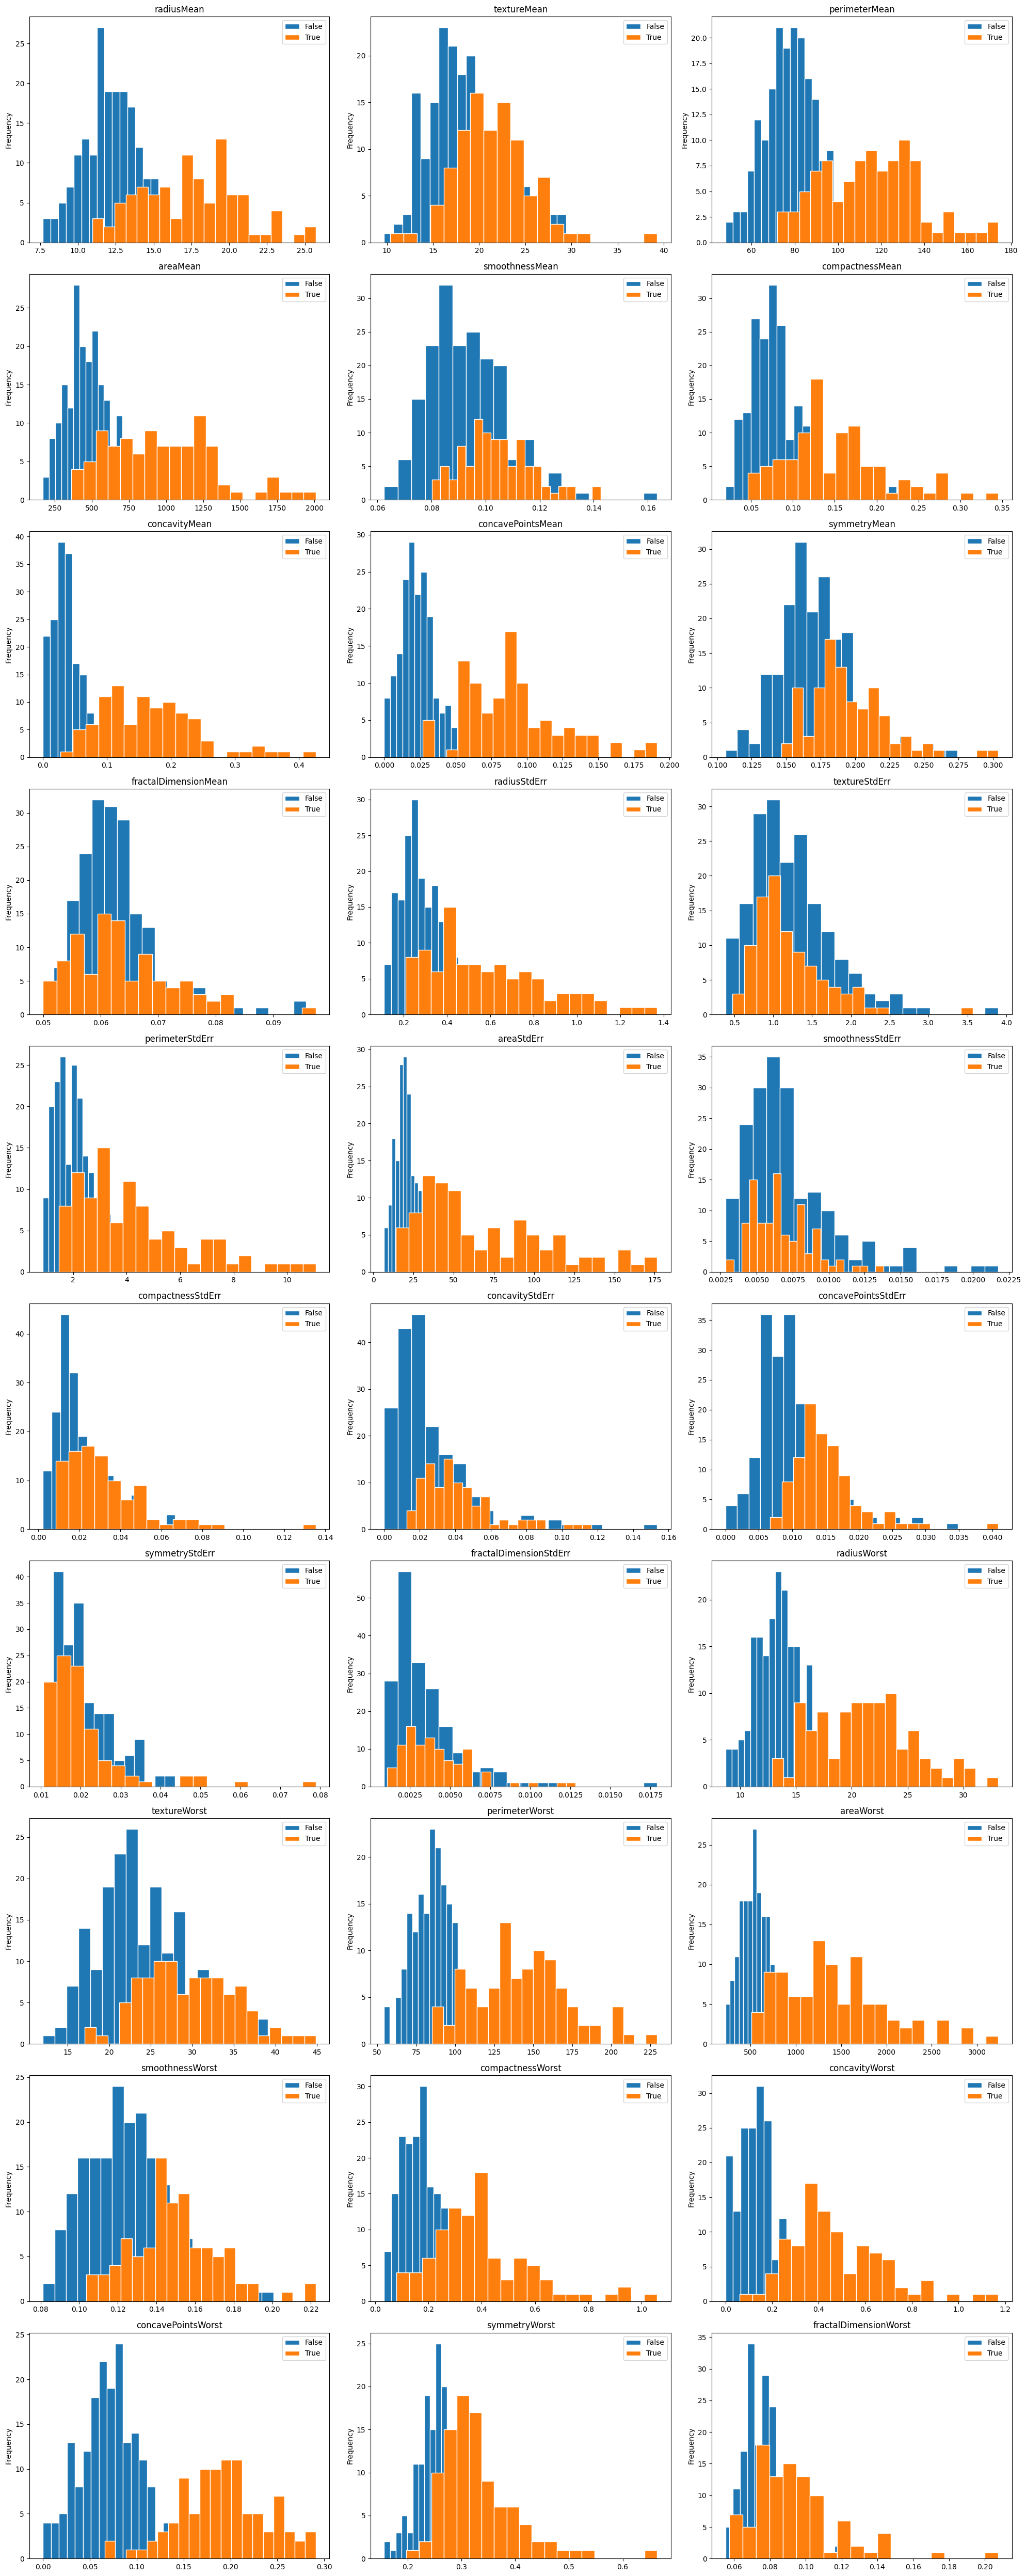

In [10]:
# get quick graphical overview of the numerical data distribution
utils.plot_numerical_data(data, data_config["target"])

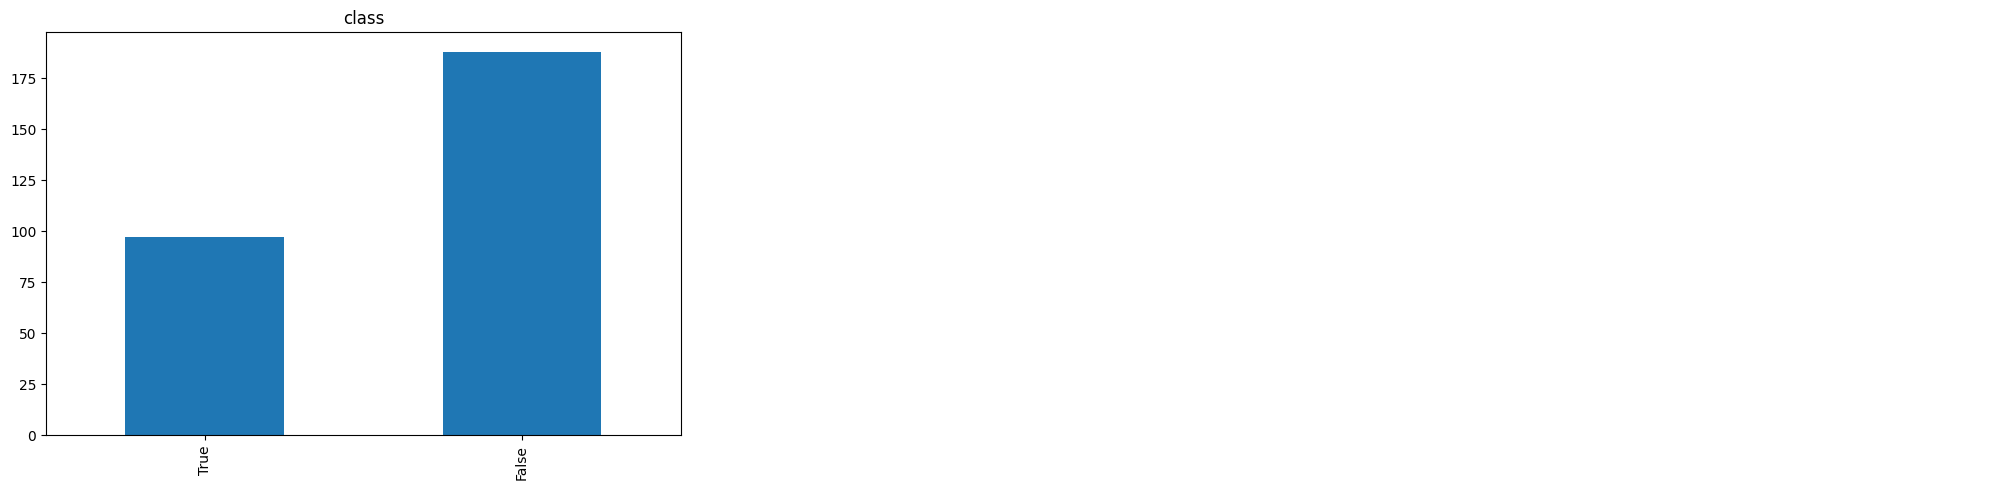

In [11]:
# get a quick graphical overview of the categorical data distribution
utils.plot_categorical_data(data)

In [12]:
############ FEATURE SELECTION ############

# determine correlations between variables
utils.print_correlation_matrix(data)

,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,radiusStdErr,textureStdErr,perimeterStdErr,areaStdErr,smoothnessStdErr,compactnessStdErr,concavityStdErr,concavePointsStdErr,symmetryStdErr,fractalDimensionStdErr,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst,class_False,class_True
radiusMean,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
textureMean,0.27,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
perimeterMean,1.00,0.28,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
areaMean,0.99,0.27,0.99,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
smoothnessMean,0.11,-0.08,0.15,0.12,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
compactnessMean,0.48,0.21,0.53,0.49,0.66,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
concavityMean,0.68,0.28,0.72,0.70,0.50,0.90,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
concavePointsMean,0.82,0.24,0.85,0.83,0.51,0.84,0.94,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
symmetryMean,0.17,0.11,0.21,0.19,0.55,0.63,0.52,0.49,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fractalDimensionMean,-0.28,-0.04,-0.23,-0.25,0.65,0.63,0.37,0.22,0.50,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [13]:
# drop highly correlated and redundant features
if data_config["remove_features"]:
    data = data.drop(data.filter(regex="Worst").columns, axis=1)  # directly related to "mean"
    data = data.drop(data.filter(regex="perimeter|area").columns, axis=1)  # directly related to "radius"
    data = data.drop(data.filter(regex="concave|concavity").columns, axis=1)  # directly related to "compactness"

list(data.columns)

['class',
 'radiusMean',
 'textureMean',
 'smoothnessMean',
 'compactnessMean',
 'symmetryMean',
 'fractalDimensionMean',
 'radiusStdErr',
 'textureStdErr',
 'smoothnessStdErr',
 'compactnessStdErr',
 'symmetryStdErr',
 'fractalDimensionStdErr']

In [14]:
# export data set
utils.export_data(data, data_config["dataset"], predict=False)